In [6]:
import os
print(os.getcwd())

o:\fraud_detection\notebooks


In [10]:
df = load_data("../data")
df.head()

Loading 2018-04-01.pkl ...
Loading 2018-04-02.pkl ...
Loading 2018-04-03.pkl ...
Loading 2018-04-04.pkl ...
Loading 2018-04-05.pkl ...
Loading 2018-04-06.pkl ...
Loading 2018-04-07.pkl ...
Loading 2018-04-08.pkl ...
Loading 2018-04-09.pkl ...
Loading 2018-04-10.pkl ...
Loading 2018-04-11.pkl ...
Loading 2018-04-12.pkl ...
Loading 2018-04-13.pkl ...
Loading 2018-04-14.pkl ...
Loading 2018-04-15.pkl ...
Loading 2018-04-16.pkl ...
Loading 2018-04-17.pkl ...
Loading 2018-04-18.pkl ...
Loading 2018-04-19.pkl ...
Loading 2018-04-20.pkl ...
Loading 2018-04-21.pkl ...
Loading 2018-04-22.pkl ...
Loading 2018-04-23.pkl ...
Loading 2018-04-24.pkl ...
Loading 2018-04-25.pkl ...
Loading 2018-04-26.pkl ...
Loading 2018-04-27.pkl ...
Loading 2018-04-28.pkl ...
Loading 2018-04-29.pkl ...
Loading 2018-04-30.pkl ...
Loading 2018-05-01.pkl ...
Loading 2018-05-02.pkl ...
Loading 2018-05-03.pkl ...
Loading 2018-05-04.pkl ...
Loading 2018-05-05.pkl ...
Loading 2018-05-06.pkl ...
Loading 2018-05-07.pkl ...
L

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [12]:
df.info()
df.describe()
df['TX_FRAUD'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


TX_FRAUD
0    0.991631
1    0.008369
Name: proportion, dtype: float64

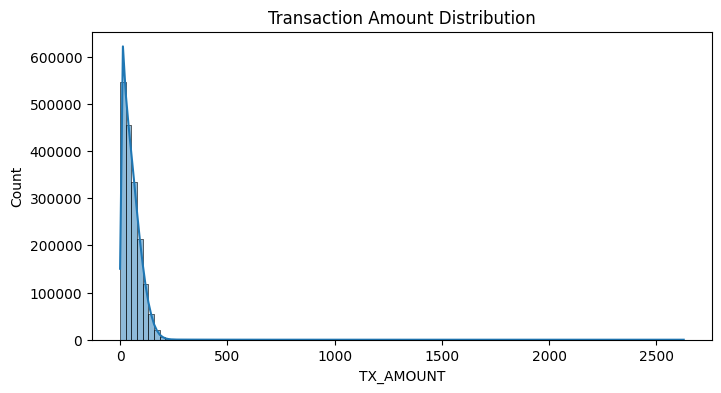

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['TX_AMOUNT'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

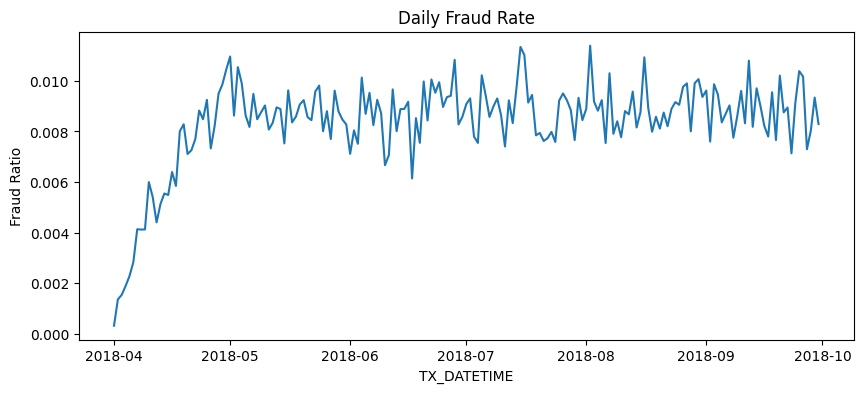

In [16]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df = df.sort_values('TX_DATETIME')

daily_tx = df.groupby(df['TX_DATETIME'].dt.date)['TX_FRAUD'].mean()
plt.figure(figsize=(10,4))
daily_tx.plot(title="Daily Fraud Rate")
plt.ylabel("Fraud Ratio")
plt.show()

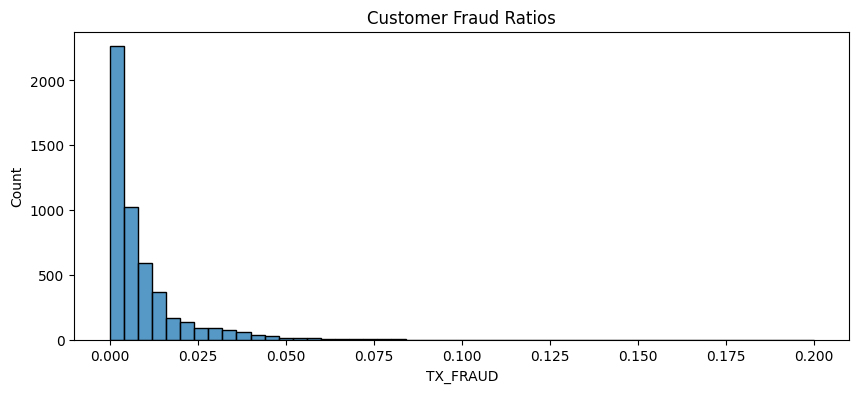

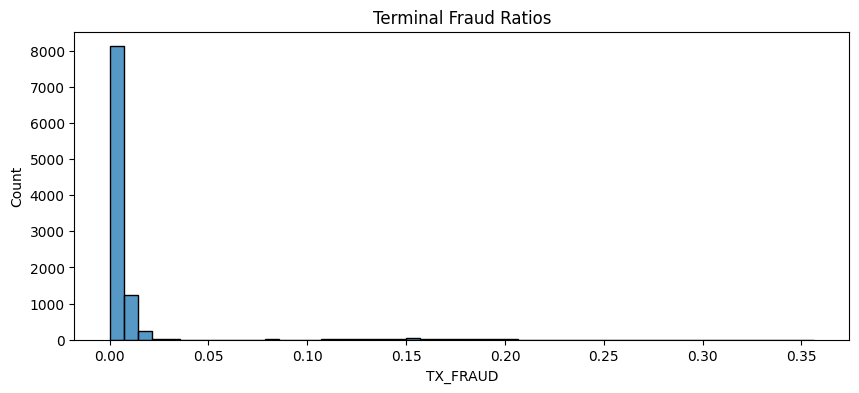

In [18]:
cust_counts = df.groupby('CUSTOMER_ID')['TX_FRAUD'].mean()
term_counts = df.groupby('TERMINAL_ID')['TX_FRAUD'].mean()

plt.figure(figsize=(10,4))
sns.histplot(cust_counts, bins=50)
plt.title("Customer Fraud Ratios")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(term_counts, bins=50)
plt.title("Terminal Fraud Ratios")
plt.show()

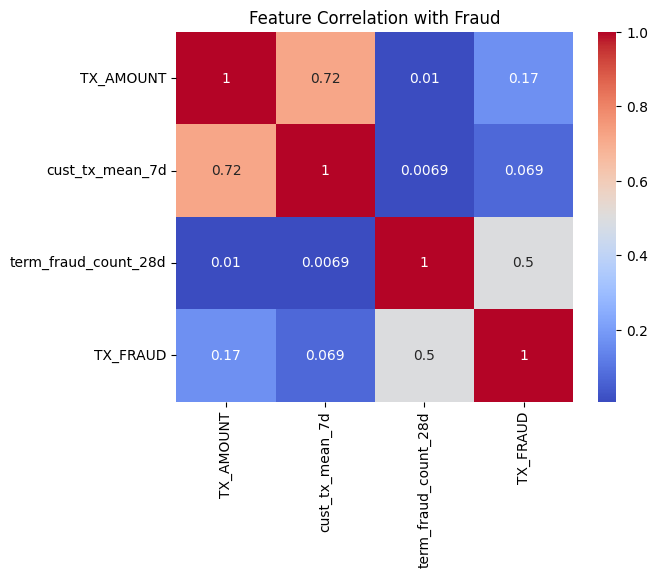

In [19]:
from src.feature_engineering import add_rolling_features
from src.preprocessing import basic_clean

df = basic_clean(df)
df = add_rolling_features(df)

corr = df[['TX_AMOUNT','cust_tx_mean_7d','term_fraud_count_28d','TX_FRAUD']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Fraud")
plt.show()